In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Exercise 1

(a) The risk of an estimator $\hat{p}(i)$ under the squared error loss is given by
$$\begin{split}
R(p, \hat{p}) 
&= \sum_{i=0}^n {n \choose i} (p - \hat{p}(i))^2 p^i (1-p)^{n-i} \\
&= \sum_{i=0}^n {n \choose i} (p^2  - 2 p \hat{p}(i) + \hat{p}(i)^2) p^i (1-p)^{n-i} \\
&= p^2 \sum_{i=0}^n {n \choose i} p^i (1-p)^{n-i} - 2 p \sum_{i=0}^n \hat{p}(i) {n \choose i} p^i (1-p)^{n-i} + \sum_{i=0}^n \hat{p}(i)^2 {n \choose i} p^i (1-p)^{n-i} \\
&= p^2 - 2 p \sum_{i=0}^n \hat{p}(i) {n \choose i} p^i (1-p)^{n-i} + \sum_{i=0}^n \hat{p}(i)^2 {n \choose i} p^i (1-p)^{n-i}. \\
\end{split}$$
Then the Bayes risk under the $\text{Beta}(\alpha, \beta)$ prior is
$$\begin{split}
r(f,\hat{p}) 
&= \int R(p, \hat{p}) f(p) dp \\
&= \int R(p, \hat{p}) \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} p^{\alpha - 1} (1 - p)^{\beta - 1} dp \\
&= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \int \left( p^2 - 2 p \sum_{i=0}^n \hat{p}(i) {n \choose i} p^i (1-p)^{n-i} + \sum_{i=0}^n \hat{p}(i)^2 {n \choose i} p^i (1-p)^{n-i} \right) p^{\alpha - 1} (1 - p)^{\beta - 1} dp \\
&= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \left[ \int p^{\alpha + 2 - 1} (1 - p)^{\beta - 1} dp - 2 \sum_{i=0}^n \hat{p}(i) {n \choose i} \int p^{\alpha + i + 1 - 1} (1-p)^{\beta + n-i - 1} dp + \sum_{i=0}^n \hat{p}(i)^2 {n \choose i} \int p^{\alpha + i - 1} (1-p)^{\beta + n-i - 1} dp \right] \\
&= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \left[ \frac{\Gamma(\alpha + 2) \Gamma(\beta)}{\Gamma(\alpha + \beta + 2)} - 2 \sum_{i=0}^n \hat{p}(i) {n \choose i} \frac{\Gamma(\alpha + i + 1) \Gamma(\beta + n - i)}{\Gamma(\alpha + \beta + n + 1)} + \sum_{i=0}^n \hat{p}(i)^2 {n \choose i} \frac{\Gamma(\alpha + i) \Gamma(\beta + n - i)}{\Gamma(\alpha + \beta + n)} \right] \\
&= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \left[ \frac{\Gamma(\alpha + 2) \Gamma(\beta)}{\Gamma(\alpha + \beta + 2)} + \frac{\Gamma(\alpha + i) \Gamma(\beta + n - i)}{\Gamma(\alpha + \beta + n)} \sum_{i=0}^n  {n \choose i} \left( - 2 \hat{p}(i) \frac{\alpha + i}{\alpha + \beta + n} + \hat{p}(i)^2 \right)  \right] \\
&= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \left[ \frac{\Gamma(\alpha + 2) \Gamma(\beta)}{\Gamma(\alpha + \beta + 2)} + \frac{\Gamma(\alpha + i) \Gamma(\beta + n - i)}{\Gamma(\alpha + \beta + n)} \sum_{i=0}^n  {n \choose i} \left( \left( \hat{p}(i) - \frac{\alpha + i}{\alpha + \beta + n} \right)^2 \right) - \left(\frac{\alpha + i}{\alpha + \beta + n} \right)^2 \right]. \\
\end{split}$$

The Bayes risk is minimised when
$$\hat{p}(i) = \frac{\alpha + i}{\alpha + \beta + n},$$
which is also the posterior mean.

(b) The risk of an estimator $\hat{\lambda}(i)$ under the squared error loss is given by
$$R(\lambda, \hat{\lambda}) = \sum_{i=0}^\infty (\lambda - \hat{\lambda}(i))^2 e^{-\lambda} \frac{\lambda^i}{i!},$$
so the Bayes risk under the $\text{Gamma}(\alpha, \beta)$ prior is
$$\begin{split}
r(f, \hat{\lambda}) 
&= \int R(\lambda, \hat{\lambda}) f(\lambda) d\lambda \\
&= \int \left( \sum_{i=0}^\infty (\lambda - \hat{\lambda}(i))^2 e^{-\lambda} \frac{\lambda^i}{i!} \right) \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda} d\lambda \\
&= \frac{\beta^\alpha}{\Gamma(\alpha)} \sum_{i=0}^\infty \frac{1}{i!} \int (\lambda - \hat{\lambda}(i))^2 \lambda^{\alpha + i - 1} e^{-(\beta + 1) \lambda} d\lambda \\
&= \frac{\beta^\alpha}{\Gamma(\alpha)} \sum_{i=0}^\infty \frac{1}{i!} \left( \int \lambda^{\alpha + i + 2 - 1} e^{-(\beta + 1) \lambda} d\lambda - 2 \hat{\lambda}(i) \int \lambda^{\alpha + i + 1 - 1} e^{-(\beta + 1) \lambda} d\lambda + \hat{\lambda}(i)^2 \int \lambda^{\alpha + i - 1} e^{-(\beta + 1) \lambda} d\lambda \right) \\
&= \frac{\beta^\alpha}{\Gamma(\alpha)} \sum_{i=0}^\infty \frac{1}{i!} \left( \frac{\Gamma(\alpha + i + 2)}{(\beta + 1)^{\alpha + i + 2}} - 2 \hat{\lambda}(i)  \frac{\Gamma(\alpha + i + 1)}{(\beta + 1)^{\alpha + i + 1}} + \hat{\lambda}(i)^2  \frac{\Gamma(\alpha + i)}{(\beta + 1)^{\alpha + i}} \right) \\
&= \frac{\beta^\alpha}{\Gamma(\alpha)}  \sum_{i=0}^\infty \frac{1}{i!} \frac{\Gamma(\alpha + i)}{(\beta + 1)^{\alpha + i}} \left( \frac{(\alpha + i)(\alpha + i + 1)}{(\beta + 1)^2} - 2 \hat{\lambda}(i) \frac{\alpha + i}{\beta + 1} + \hat{\lambda}(i)^2 \right) \\
&= \frac{\beta^\alpha}{\Gamma(\alpha)}  \sum_{i=0}^\infty \frac{1}{i!} \frac{\Gamma(\alpha + i)}{(\beta + 1)^{\alpha + i}} \left( \frac{(\alpha + i)(\alpha + i + 1)}{(\beta + 1)^2} + \left( \hat{\lambda}(i) - \frac{\alpha + i}{\beta + 1}\right)^2 - \left( \frac{\alpha + i}{\beta + 1} \right)^2 \right). \\
\end{split}$$
This is minimised by
$$\hat{\lambda}(i) = \frac{\alpha + i}{\beta + 1},$$
which is of course also the posterior mean.

(c) The risk of an estimateor $\hat{\theta}(x)$ under the squred error loss is given by
$$\begin{split}
R(\theta, \hat{\theta}) 
&= \int (\theta - \hat{\theta}(x))^2 \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} dx \\
&= \theta^2 - 2 \theta \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x) \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} dx + \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x)^2 \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} dx, \\
\end{split}$$
so the Bayes risk under the $N(a, b^2)$ prior is
$$\begin{split}
r(f, \hat{\theta}) 
&= \int R(\theta, \hat{\theta}) f(\theta) d\theta \\
&= \int \left( \theta^2 - 2 \theta \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x) \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} dx + \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x)^2 \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} dx \right) \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} d\theta \\
&= \int \theta^2 \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} d\theta - 2 \int \theta \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x) \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} dx d\theta + \int \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x)^2 \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} dx d\theta \\
&= I_1 + -2 I_2 + I_3,
\end{split}$$
where
$$\begin{split}
I_1 &= \int \theta^2 \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} d\theta = \mathbb{E}[\theta^2] = \mathbb{V}[\theta] + \mathbb{E}[\theta]^2 = b^2 + a^2, \\
I_2 &= \int \theta \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x) \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} dx d\theta \\
&= \frac{1}{2\pi\sigma b} \int \hat{\theta}(x) \int \theta \exp\left\{ -\frac{(x-\theta)^2}{2\sigma^2} - \frac{(\theta - a)^2}{2b^2} \right\} d\theta dx \\
&= \frac{1}{2\pi\sigma b} \int \hat{\theta}(x) \int \theta \exp\left\{ -\frac{x^2-2x\theta+\theta^2}{2\sigma^2} - \frac{\theta^2 - 2a\theta + a^2}{2b^2} \right\} d\theta dx \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \exp\left\{-\frac{x^2}{2\sigma^2}\right\} \int \theta \exp\left\{ -\frac{1}{2} \theta^2 \left( \frac{1}{\sigma^2} + \frac{1}{b^2} \right) + \theta \left( \frac{x}{\sigma^2} + \frac{a}{b^2} \right)  \right\} d\theta dx \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \exp\left\{-\frac{x^2}{2\sigma^2}\right\} \int \theta \exp\left\{ -\frac{1}{2\tau^2} ( \theta^2 - 2 \theta \mu ) \right\} d\theta dx, \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \exp\left\{-\frac{x^2}{2\sigma^2}\right\} \int \theta \exp\left\{ -\frac{1}{2\tau^2} ( (\theta - \mu)^2 - \mu^2 ) \right\} d\theta dx, \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} \int \theta \exp\left\{ -\frac{(\theta - \mu)^2}{2\tau^2}  \right\} d\theta dx, \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} \sqrt{2\pi} \tau \mu dx, \\
&= \frac{\tau}{\sqrt{2\pi}\sigma b } \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \mu \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\}  dx, \\
I_3 &= \int \frac{1}{\sqrt{2\pi}\sigma} \int \hat{\theta}(x)^2 \exp\left\{-\frac{(x-\theta)^2}{2\sigma^2}\right\} \frac{1}{\sqrt{2\pi} b} \exp\left\{ -\frac{(\theta - a)^2}{2b^2} \right\} d\theta dx \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x)^2 \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} \int \exp\left\{ -\frac{(\theta - \mu)^2}{2\tau^2}  \right\} d\theta dx, \\
&= \frac{1}{2\pi\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x)^2 \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} \sqrt{2\pi} \tau dx, \\
&= \frac{\tau}{\sqrt{2\pi}\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x)^2 \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} dx, \\
\end{split}
$$
and
$$\begin{split}
\frac{1}{\tau^2} &= \frac{1}{\sigma^2} + \frac{1}{b^2} \\
\mu &= \frac{\frac{x}{\sigma^2} + \frac{a}{b^2}}{\frac{1}{\sigma^2} + \frac{1}{b^2}}.
\end{split}$$
Therefore,
$$\begin{split}
r(f, \hat{\theta}) 
&= I_1 + -2I_2 + I_3 \\
&= b^2 + a^2 - 2 \frac{\tau}{\sqrt{2\pi}\sigma b } \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x) \mu \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} dx + \frac{\tau}{\sqrt{2\pi}\sigma b} \exp\left\{-\frac{a^2}{2b^2}\right\} \int \hat{\theta}(x)^2 \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} \sqrt{2\pi} dx \\
&= b^2 + a^2 + \frac{\tau}{\sqrt{2\pi}\sigma b } \exp\left\{-\frac{a^2}{2b^2}\right\} \int (\hat{\theta}(x)^2 - 2 \mu\hat{\theta}(x)) \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} dx \\
&= b^2 + a^2 + \frac{\tau}{\sqrt{2\pi}\sigma b } \exp\left\{-\frac{a^2}{2b^2}\right\} \int ((\hat{\theta}(x) - \mu)^2 - \mu^2) \exp\left\{-\frac{x^2}{2\sigma^2} + \frac{\mu^2}{2\tau^2}\right\} dx,
\end{split}$$
which is minimised by
$$\hat{\theta} = \mu = \frac{\frac{x}{\sigma^2} + \frac{a}{b^2}}{\frac{1}{\sigma^2} + \frac{1}{b^2}}.$$

## Exercise 2

From Definition 12.6, we have that multiplying the risk by a positive constant does not change the resulting Bayes and minimax estimators. Therefore, the Bayes estimator under $L(\theta, \hat{\theta}) = (\theta-\hat{\theta})^2 / \sigma^2$ is the same as under the squared error loss.

By Theorem 12.20, $\widehat{X}$ is admissible under the squared error loss. The risk is
$$\mathbb{E}[(\widehat{X} - \theta)^2] = \mathbb{V}[\widehat{X}] = \frac{\sigma^2}{n},$$
which is constant with respect to $\theta$, so by Theorem 12.21, $\widehat{X}$ is also minimax.

## Exercise 3

Since the parameter space is finite, the posterior risk becomes
$$\begin{split}
r(\hat{\theta} | x)
&= \int L(\theta, \hat{\theta}(x)) f(\theta|x) d\theta \\
&= \sum_{i=1}^k \mathbb{1}_{\hat{\theta}(x) \neq \theta_i} \mathbb{P}(\theta_i | x) \\
&= \mathbb{P}(\hat{\theta}(x) \neq \theta_i | x) \\
&= 1 - \mathbb{P}(\hat{\theta}(x) = \theta_i | x). \\
\end{split}$$
This is minimised when $\mathbb{P}(\hat{\theta}(x) = \theta_i | x)$ is maximised, which is when 
$$\hat{\theta}(x) = \underset{\theta_i}{\operatorname{argmax}} \mathbb{P}[\theta_i | x].$$

## Exercise 4

The risk of an estimator $\hat{\sigma}^2 = b S^2$ is given by
$$\begin{split}
\mathbb{E}[L(\sigma^2, \hat{\sigma}^2)] 
&= \mathbb{E}\left[ \frac{bS^2}{\sigma^2} - 1 - \log \left(\frac{b S^2}{\sigma^2}\right)\right] \\
&= b\frac{\mathbb{E}[S^2]}{\sigma^2} - 1 - \log b - \mathbb{E}\left[ \log \left( \frac{S^2}{\sigma^2} \right)\right] \\
&= b\frac{\sigma^2}{\sigma^2} - 1 - \log b - \mathbb{E}\left[ \log \left( \frac{S^2}{\sigma^2} \right)\right] \\
&= b - 1 - \log b - \mathbb{E}\left[ \log \left( \frac{S^2}{\sigma^2} \right)\right]. \\
\end{split}$$

Taking the derivative and setting it to 0:
$$1 - \frac{1}{b} = 0,$$
we obtain $b = 1$. The second derivative
$$\frac{1}{b^2} > 0,$$
so this is a minimum. Hence the risk is minimised by $b = 1$.

## Exercise 5

In [76]:
n = 10
i = 3
a = 0.1

In [78]:
def p_hat(i):
    return np.where(i == 5, a, 0)

In [83]:
def risk(p):
    i = np.arange(n + 1)
    return np.sum(stats.binom.pmf(i, n, p) * (1 - p_hat(i) / p) ** 2, axis=1)

In [112]:
p = np.linspace(0, 1, 10000)[1:].reshape(-1, 1)
i = np.arange(n + 1)
np.nanmax(risk(p))

np.float64(1.000027487640225)

In [103]:
p[36]

array([0.03703704])

In [111]:
(stats.binom.pmf(i, n, p[36]) * (1 - p_hat(i) / p[36]) ** 2)[:6]

array([6.85639514e-01, 2.63707505e-01, 4.56416836e-02, 4.68119832e-03,
       3.15080656e-04, 4.20269121e-05])

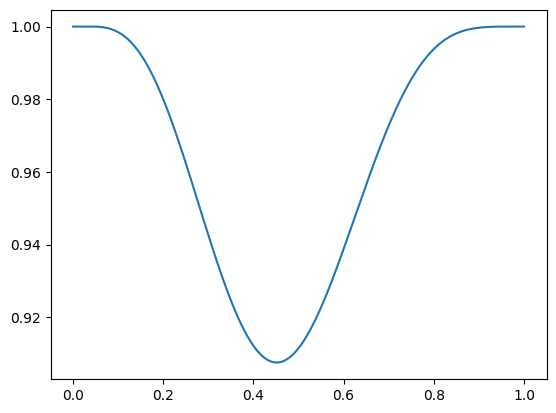

In [98]:
fig, ax = plt.subplots()
ax.plot(p, risk(p));

## Exercise 6

In [115]:
rng = np.random.default_rng(12345)

In [116]:
def squared_error_loss(theta_hat, theta):
    return np.sum((theta - theta_hat) ** 2)

In [141]:
def evaluate_estimator(rvs, estimator, theta, m=100_000):
    k = len(theta)
    X = rvs(theta, size=(m, k), random_state=rng)
    theta_hat = np.apply_along_axis(estimator, 1, X)
    risk = np.apply_along_axis(squared_error_loss, 1, theta_hat, theta)
    return np.mean(risk)

In [142]:
def mle_estimator(x):
    return x

In [143]:
def james_stein_estimator(x):
    return np.maximum(0, 1 - (k - 2) / np.sum(x ** 2)) * x

In [144]:
thetas = [
    np.array([2.]),
    np.array([1., 2.]),
    np.array([1., 2., 3.]),
    np.array([2., 3., 4.]),
    np.array([2., 3., 4., 5.]),
    np.array([20., 30., 40., 50.]),
]

In [145]:
%%time
pd.DataFrame([
    [
        evaluate_estimator(stats.norm.rvs, mle_estimator, theta),
        evaluate_estimator(stats.norm.rvs, james_stein_estimator, theta),
    ] for theta in thetas
], columns=['MLE', 'James-Stein'])

,MLE,James-Stein
0,1.001841,1.454350
1,1.989989,2.018032
2,3.003070,2.917795
3,3.015192,2.965855
4,4.016537,3.942073
5,4.021539,4.003718
